**Descriptive analysis of the data**

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score
import sklearn.model_selection as sk
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree

In [13]:
Url=pd.read_csv('Phishing_Legitimate_full.csv')

In [14]:
Url.head(10)

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
0,1,3,1,5,72,0,0,0,0,0,...,0,0,1,1,0,1,1,-1,1,1
1,2,3,1,3,144,0,0,0,0,2,...,0,0,0,1,-1,1,1,1,1,1
2,3,3,1,2,58,0,0,0,0,0,...,0,0,0,1,0,-1,1,-1,0,1
3,4,3,1,6,79,1,0,0,0,0,...,0,0,0,1,-1,1,1,1,-1,1
4,5,3,0,4,46,0,0,0,0,0,...,1,0,0,1,1,-1,0,-1,-1,1
5,6,3,1,1,42,1,0,0,0,0,...,1,1,0,1,1,1,1,-1,1,1
6,7,2,0,5,60,0,0,0,0,0,...,0,0,0,1,0,1,1,-1,-1,1
7,8,1,0,3,30,0,0,0,0,0,...,0,0,0,1,1,1,1,1,1,1
8,9,8,7,2,76,1,1,0,0,0,...,0,0,0,-1,-1,1,1,1,-1,1
9,10,2,0,2,46,0,0,0,0,0,...,0,0,0,1,1,1,1,-1,-1,1


Notre dataset contient 50 variables et 10 000 échantillons

In [15]:
Url.shape

(10000, 50)

In [16]:
Url.info

<bound method DataFrame.info of          id  NumDots  SubdomainLevel  PathLevel  UrlLength  NumDash  \
0         1        3               1          5         72        0   
1         2        3               1          3        144        0   
2         3        3               1          2         58        0   
3         4        3               1          6         79        1   
4         5        3               0          4         46        0   
...     ...      ...             ...        ...        ...      ...   
9995   9996        3               1          1         50        0   
9996   9997        2               1          4         59        1   
9997   9998        2               1          4         57        0   
9998   9999        3               1          1         49        0   
9999  10000        3               1          2         52        3   

      NumDashInHostname  AtSymbol  TildeSymbol  NumUnderscore  ...  \
0                     0         0            

In [17]:
Url.isnull().sum()

id                                    0
NumDots                               0
SubdomainLevel                        0
PathLevel                             0
UrlLength                             0
NumDash                               0
NumDashInHostname                     0
AtSymbol                              0
TildeSymbol                           0
NumUnderscore                         0
NumPercent                            0
NumQueryComponents                    0
NumAmpersand                          0
NumHash                               0
NumNumericChars                       0
NoHttps                               0
RandomString                          0
IpAddress                             0
DomainInSubdomains                    0
DomainInPaths                         0
HttpsInHostname                       0
HostnameLength                        0
PathLength                            0
QueryLength                           0
DoubleSlashInPath                     0


Il n'y a pas de valeurs null

In [18]:
Url.describe()

,id,NumDots,SubdomainLevel,PathLevel,UrlLength,NumDash,NumDashInHostname,AtSymbol,TildeSymbol,NumUnderscore,...,IframeOrFrame,MissingTitle,ImagesOnlyInForm,SubdomainLevelRT,UrlLengthRT,PctExtResourceUrlsRT,AbnormalExtFormActionR,ExtMetaScriptLinkRT,PctExtNullSelfRedirectHyperlinksRT,CLASS_LABEL
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,2.445100,0.586800,3.300300,70.264100,1.818000,0.138900,0.000300,0.013100,0.32320,...,0.339600,0.03220,0.030400,0.956600,0.020200,0.353300,0.793200,0.173400,0.314100,0.500000
std,2886.89568,1.346836,0.751214,1.863241,33.369877,3.106258,0.545744,0.017319,0.113709,1.11466,...,0.473597,0.17654,0.171694,0.248037,0.820036,0.888908,0.521019,0.755771,0.897843,0.500025
min,1.00000,1.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,0.000000
25%,2500.75000,2.000000,0.000000,2.000000,48.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,-1.000000,-1.000000,1.000000,0.000000,-1.000000,0.000000
50%,5000.50000,2.000000,1.000000,3.000000,62.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.500000
75%,7500.25000,3.000000,1.000000,4.000000,84.000000,2.000000,0.000000,0.000000,0.000000,0.00000,...,1.000000,0.00000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,10000.00000,21.000000,14.000000,18.000000,253.000000,55.000000,9.000000,1.000000,1.000000,18.00000,...,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


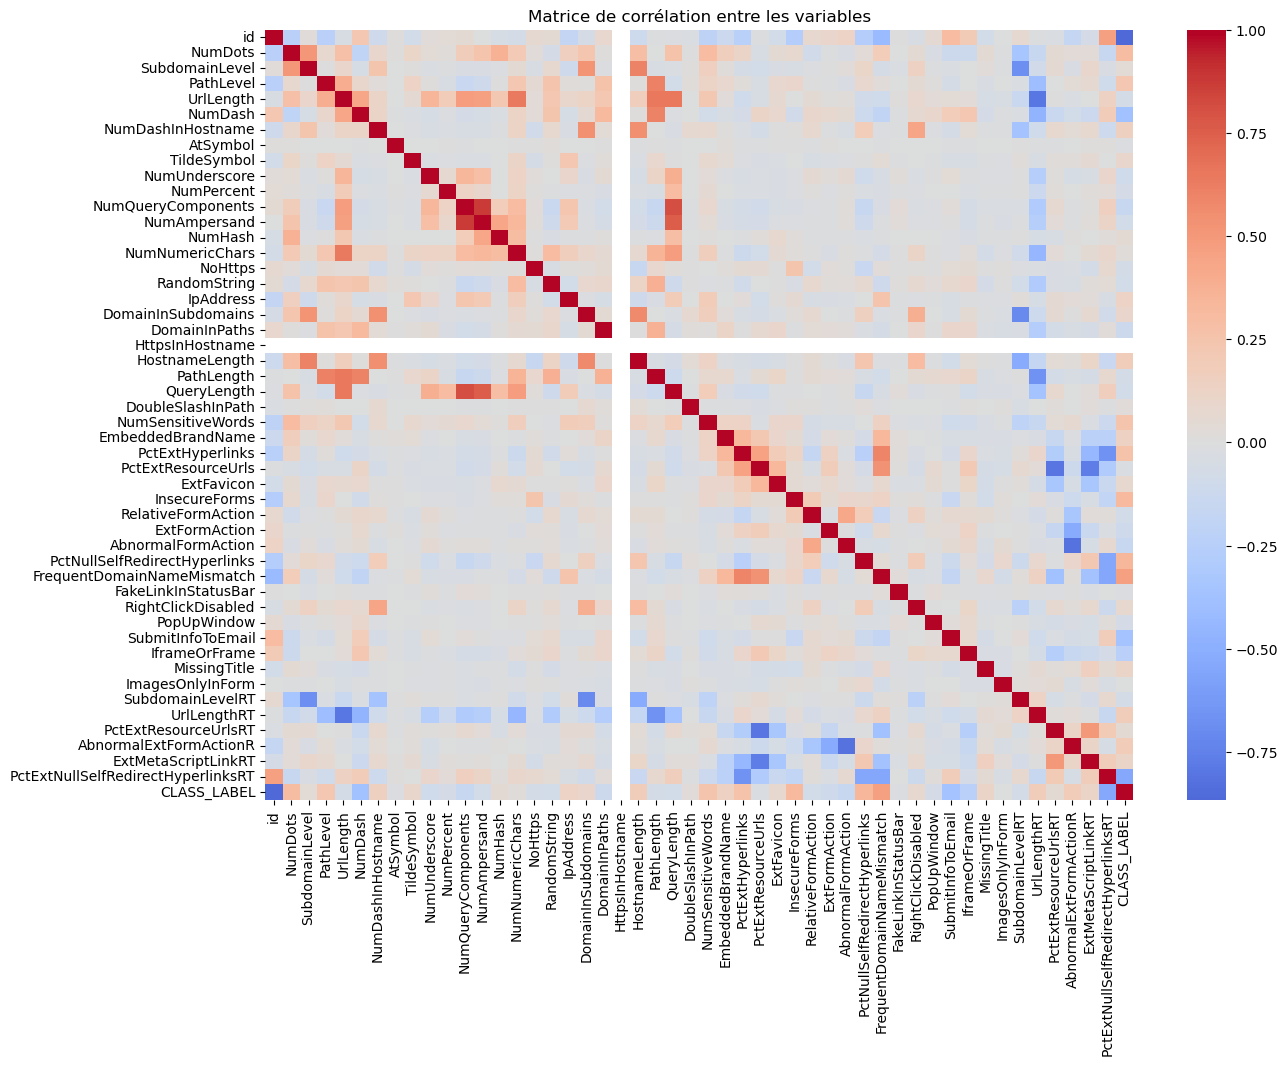

In [19]:
import seaborn as sns
plt.figure(figsize=(14,10))
sns.heatmap(Url.corr(), cmap="coolwarm", center=0)
plt.title("Matrice de corrélation entre les variables")
plt.show()

**Implementation of the necessary pre-processing**


Il n'y a de valeurs null dans aucune colonne

In [20]:
X=Url.drop(["CLASS_LABEL","id"],axis=1)
y=Url["CLASS_LABEL"].round()

In [21]:
X_train,X_test,y_train,y_test=sk.train_test_split(X,y,random_state=42,test_size=0.2,stratify=y)
y_train

7858    0
1842    1
8905    0
2684    1
6564    0
       ..
4987    1
6717    0
3795    1
8691    0
5131    0
Name: CLASS_LABEL, Length: 8000, dtype: int64

In [22]:
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

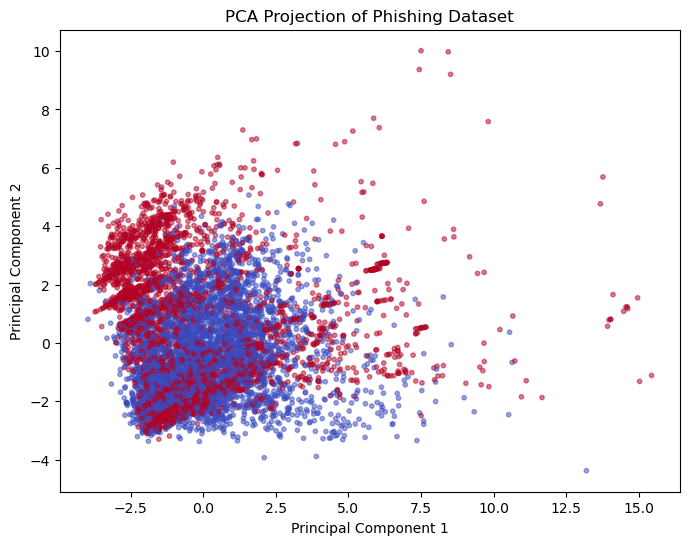

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='coolwarm', alpha=0.5, s=10)
plt.title('PCA Projection of Phishing Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

**Formalisation of the problem**

Ici nous cherchons à prédire si une Url est malicieuse ou pas en fonction de ses caractéristiques, nous avons donc en face de nous un problème de classification binaire.
La variable à prédire est "Class Label", les variables explicatives sont les 48 autres variables (toutes les autres sauf "id").
On pourra utiliser l'accuracy comme métrique d'évaluation car notre dataset est équilibré donc elle sera bien représentative

**Selection of a baseline model and implementation of the model**

In [ ]:
model_reg = LogisticRegression(max_iter=1000, random_state=42)
model_reg.fit(X_train_scaled, y_train)

y_pred_lr = model_reg.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.952


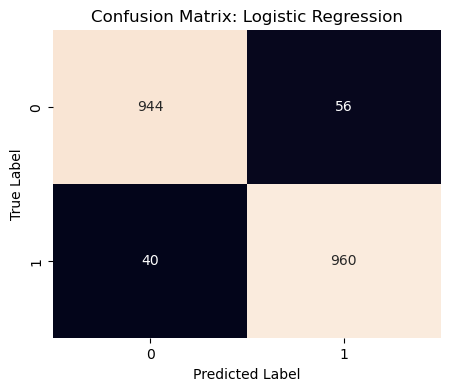

In [43]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Logistic Regression')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [44]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini",max_depth=10,random_state=42)

In [45]:
model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=10, random_state=42)

In [46]:
y_pred=model.predict(X_test)

In [47]:
from sklearn.metrics import (accuracy_score)
print("Accuracy :", accuracy_score(y_test, y_pred))

Accuracy : 0.965


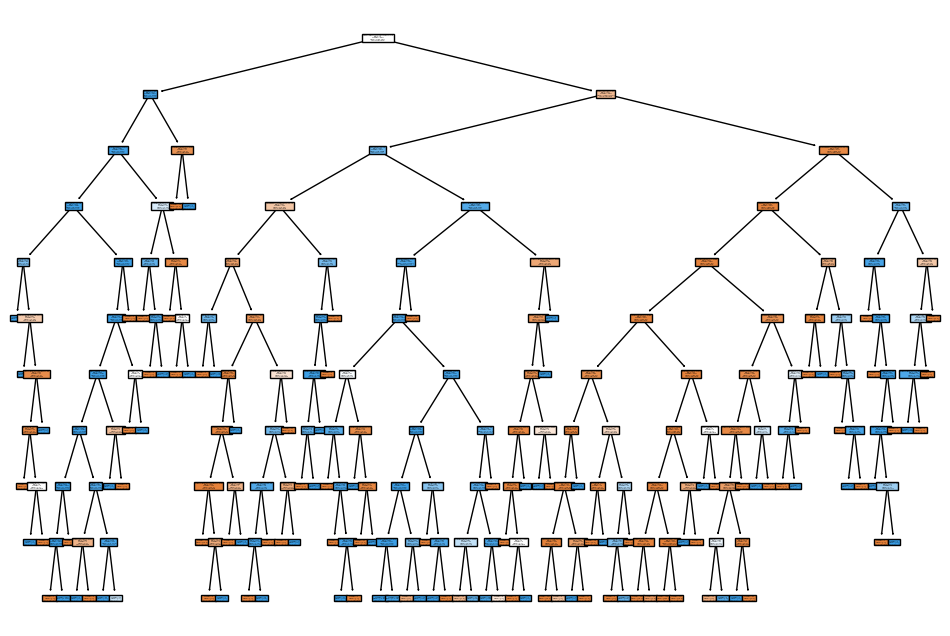

In [48]:
from sklearn import tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
tree.plot_tree(model, filled=True, feature_names=X.columns, class_names=["Legitimate", "Phishing"])
plt.show()

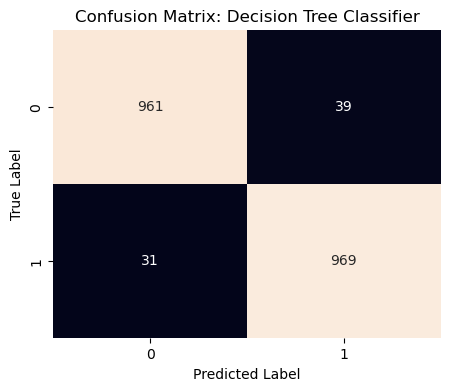

In [49]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Decision Tree Classifier')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Implementation d'un GridSearch**

In [50]:
tree_param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10]
}

In [51]:
grid_search_tree = GridSearchCV(
    estimator=model,
    param_grid=tree_param_grid,
    scoring='f1',
    cv=2,
    verbose=1,
    refit=True
)

In [52]:
grid_search_tree.fit(X_train, y_train) 

Fitting 2 folds for each of 30 candidates, totalling 60 fits


GridSearchCV(cv=2,
             estimator=DecisionTreeClassifier(max_depth=10, random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10, None],
                         'min_samples_split': [2, 5, 10]},
             scoring='f1', verbose=1)

In [53]:
bestTree=grid_search_tree.best_estimator_
y_pred=bestTree.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      1000
           1       0.96      0.97      0.97      1000

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000



In [54]:
best_model=grid_search_tree.best_estimator_
print(best_model)
print(best_model.score(X_test, y_test))

DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)
0.965


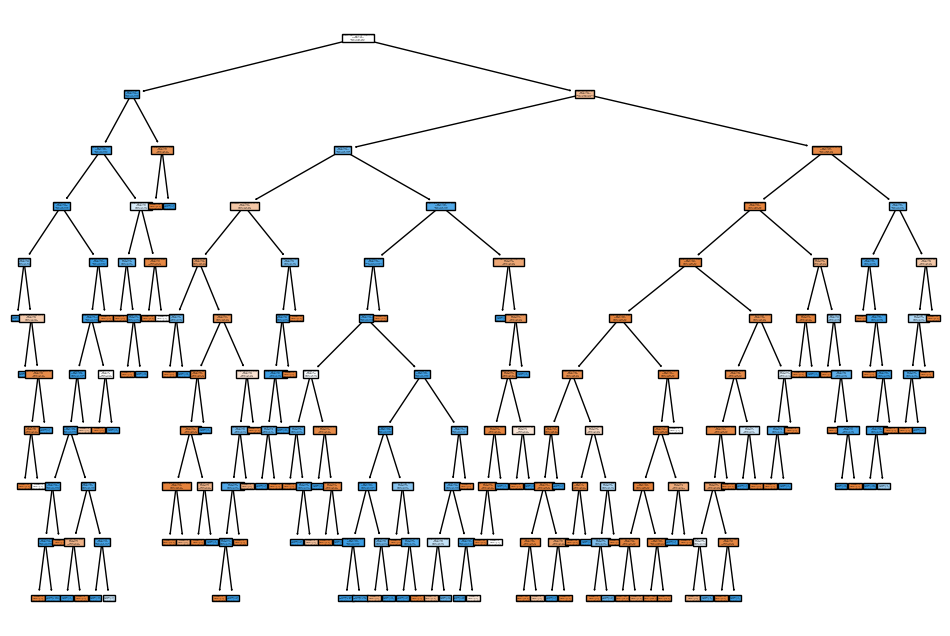

In [55]:

plt.figure(figsize=(12, 8))
tree.plot_tree(best_model, filled=True, feature_names=X.columns, class_names=["Legitimate", "Phishing"])
plt.show()

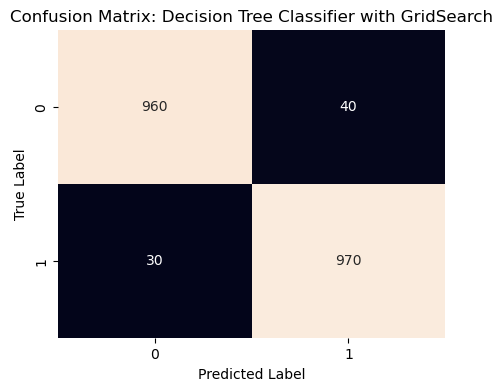

In [56]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Decision Tree Classifier with GridSearch')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

**Random Forest**

In [57]:
from sklearn.ensemble import RandomForestClassifier

In [58]:
model_RFC=RandomForestClassifier(max_depth=8, random_state=0)
model_RFC.fit(X_train,y_train)

RandomForestClassifier(max_depth=8, random_state=0)

In [59]:
y_pred_RFC=model_RFC.predict(X_test)

In [60]:
print(classification_report(y_test, y_pred_RFC))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      1000
           1       0.98      0.97      0.98      1000

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



In [61]:
from sklearn.metrics import (accuracy_score)
print("Accuracy :", accuracy_score(y_test, y_pred_RFC))

Accuracy : 0.9755


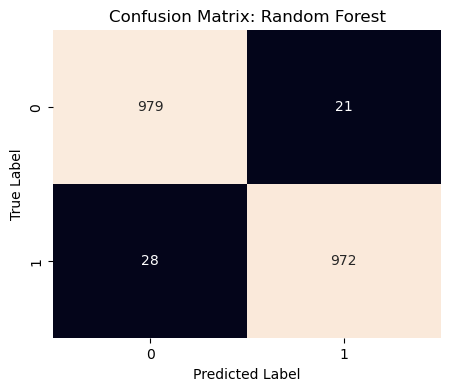

In [62]:
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred_RFC), annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix: Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()